In [1]:
import pandas as pd
import numpy as np
import networkx as nx

df = pd.read_csv('./Data/pp_sim_2017_2019.csv', delimiter=';')
df

,HS6_i,HS6_j,n_ij,n_i,n_j,n,psim,psim_norm,link01,short_name_ENG_i,short_name_ENG_j
0,107111,107112,356,6275,6167,731532,6.729699,0.741258,1,Fresh bread containing by,Cake and pastry products;
1,181214,181219,60,4081,3683,731532,2.920225,0.489825,1,"Printed books, brochures,",Printed calendars of any
2,181212,181214,59,3287,4081,731532,3.217504,0.525786,1,Printed commercial catalo,"Printed books, brochures,"
3,310112,310912,57,3568,3342,731532,3.496849,0.555244,1,Wooden furniture of a kin,Wooden bedroom furniture
4,181213,181214,55,2586,4081,731532,3.812421,0.584409,1,"Printed newspapers, journ","Printed books, brochures,"
...,...,...,...,...,...,...,...,...,...,...,...
40086,242034,289230,1,1226,1175,731532,0.507814,-0.326423,0,"Tubes and pipes, of non-c",Pile-drivers and pile-ext
40087,242034,289227,1,1226,969,731532,0.615771,-0.237799,0,"Tubes and pipes, of non-c",Bulldozer or angledozer b
40088,242034,282983,1,1226,1097,731532,0.543922,-0.295403,0,"Tubes and pipes, of non-c",Cylinders for calendering
40089,242034,282922,1,1226,1720,731532,0.346908,-0.484882,0,"Tubes and pipes, of non-c",Fire extinguishers


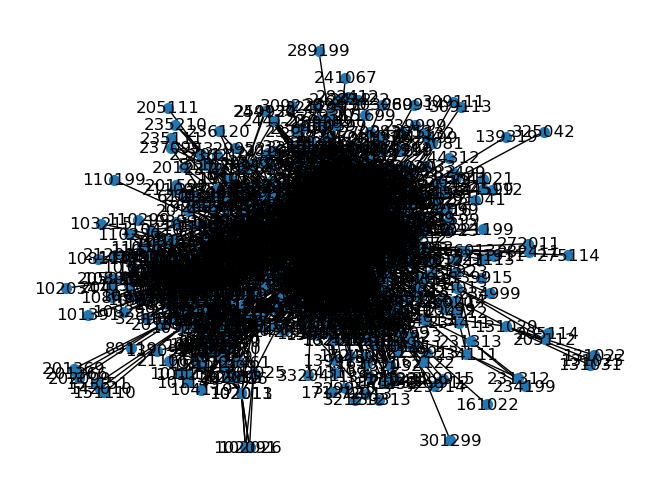

In [2]:
G = nx.Graph()

# Add the nodes

unique_product_codes = set(df['HS6_i']).union(set(df['HS6_j']))

G.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df.iterrows():
    product_i = row['HS6_i']
    product_j = row['HS6_j']
    weight = row['n_ij']
    G.add_edge(product_i, product_j, weight=weight)

nx.draw(G,node_size=50,with_labels=True)


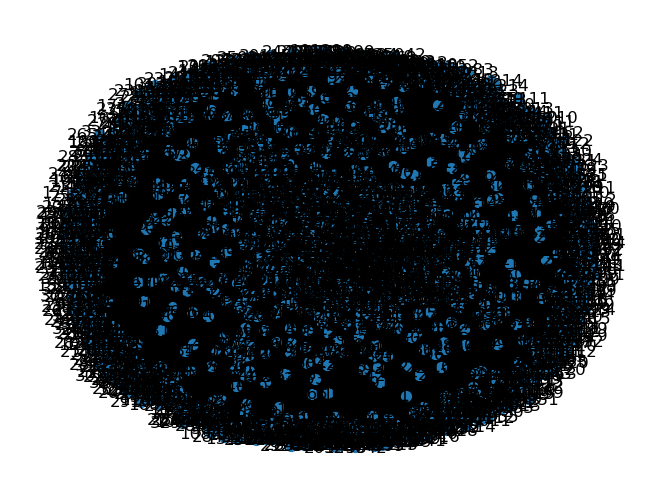

In [3]:
# Calculate the total value of weights
total_weight = sum([d['weight'] for u, v, d in G.edges(data=True)])

# Normalize weights using the total value
for u, v, d in G.edges(data=True):
    d['weight'] /= total_weight

nx.draw(G,node_size=50,with_labels=True)


Density: 0.04331914249902753
Average total degree: 58.914033798677444


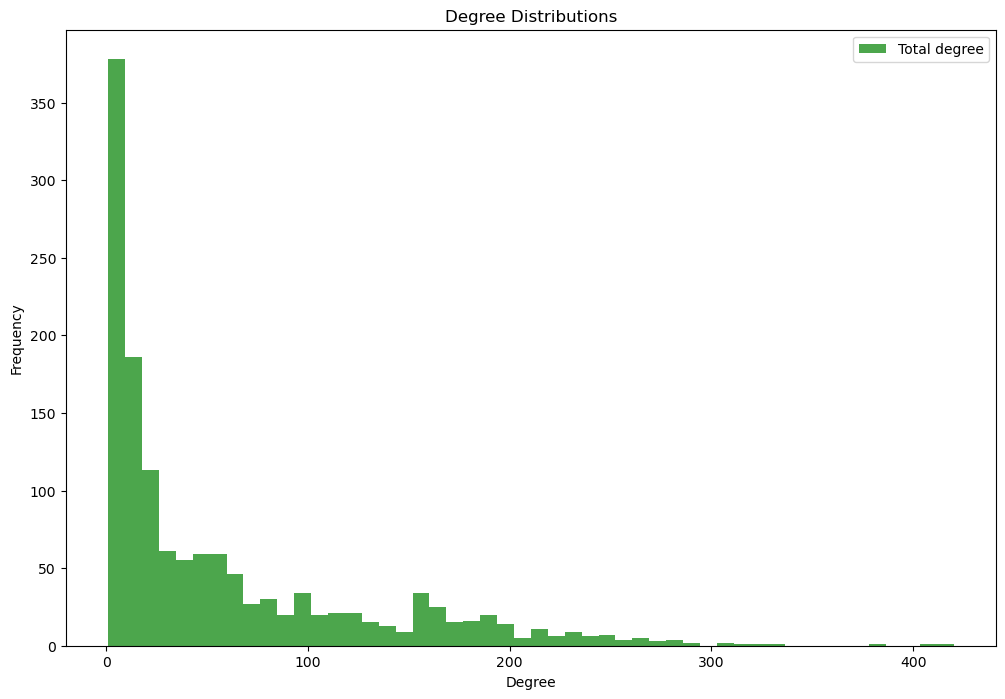

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Density
density = nx.density(G)
print("Density:", density)

# Average degrees
total_degrees = dict(G.degree())


average_total_degree = sum(total_degrees.values()) / len(total_degrees)

print("Average total degree:", average_total_degree)

# Degree distributions

total_degree_sequence = [degree for node, degree in G.degree()]

# Plot degree distributions
plt.figure(figsize=(12, 8))

plt.hist(total_degree_sequence, bins=50, color='green', alpha=0.7, label='Total degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distributions')
plt.legend()
plt.show()

Calculating best minimal value for power law fit


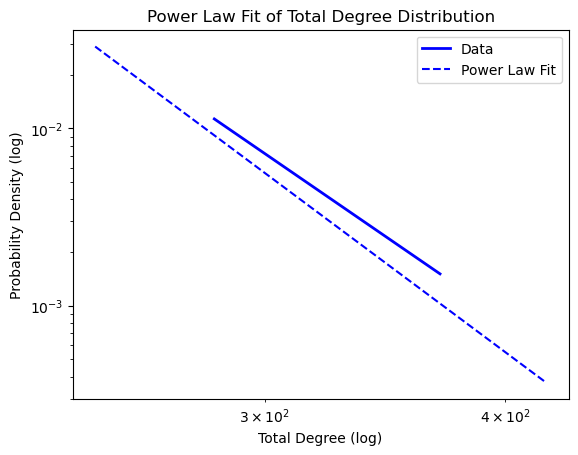

Alpha (scaling parameter): 8.088010355444128
Xmin (minimum value of the power law distribution): 245.0


In [20]:
import powerlaw

# Fit power law to the total degree distribution
fit = powerlaw.Fit(total_degree_sequence)

# Get the alpha (scaling parameter) and xmin (minimum value of the power law distribution)
alpha = fit.alpha
xmin = fit.xmin

# Plot the degree distribution and the power law fit
fig = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig)

# Visualize the data and the fit on a log-log scale
plt.xlabel('Total Degree (log)')
plt.ylabel('Probability Density (log)')
plt.title('Power Law Fit of Total Degree Distribution')
plt.legend(['Data', 'Power Law Fit'])
plt.show()

print("Alpha (scaling parameter):", alpha)
print("Xmin (minimum value of the power law distribution):", xmin)


In [4]:
As = nx.adjacency_matrix(G)
A =As.todense()
print(A)


[[0.00000000e+00 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  1.69652552e-05 1.69652552e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.69652552e-05 0.00000000e+00 0.00000000e+00 ... 1.69652552e-05
  1.69652552e-05 1.69652552e-05]
 ...
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 0.00000000e+00
  1.69652552e-05 1.69652552e-05]
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  0.00000000e+00 1.69652552e-05]
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  1.69652552e-05 0.00000000e+00]]


In [13]:
d = nx.degree(G)
d = dict(d)

print("average degree: ", sum(d.values())/len(G.nodes))

average degree:  58.914033798677444


In [6]:
nx.degree_histogram(G)

[0,
 47,
 56,
 48,
 53,
 35,
 43,
 33,
 25,
 38,
 26,
 22,
 35,
 25,
 25,
 19,
 15,
 19,
 18,
 14,
 14,
 15,
 11,
 10,
 14,
 10,
 7,
 6,
 9,
 13,
 8,
 6,
 4,
 10,
 5,
 8,
 9,
 8,
 7,
 5,
 7,
 5,
 6,
 7,
 9,
 3,
 8,
 5,
 12,
 7,
 1,
 7,
 12,
 6,
 8,
 7,
 9,
 8,
 6,
 3,
 8,
 7,
 7,
 4,
 3,
 3,
 5,
 7,
 2,
 2,
 2,
 3,
 3,
 2,
 6,
 5,
 4,
 5,
 3,
 6,
 3,
 3,
 3,
 5,
 2,
 0,
 5,
 1,
 3,
 1,
 3,
 4,
 2,
 1,
 1,
 7,
 0,
 6,
 3,
 5,
 7,
 5,
 4,
 3,
 3,
 1,
 3,
 1,
 3,
 2,
 2,
 2,
 3,
 0,
 4,
 1,
 3,
 5,
 1,
 6,
 3,
 3,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 4,
 2,
 1,
 0,
 2,
 0,
 3,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 8,
 8,
 1,
 6,
 2,
 1,
 7,
 5,
 2,
 4,
 4,
 4,
 1,
 1,
 4,
 3,
 1,
 3,
 2,
 3,
 2,
 0,
 1,
 1,
 1,
 3,
 4,
 1,
 0,
 2,
 4,
 0,
 3,
 3,
 2,
 5,
 1,
 0,
 1,
 5,
 1,
 3,
 0,
 0,
 3,
 2,
 2,
 3,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 3,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 3,
 0,
 0,
 2,

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

(0.0, 440.0)

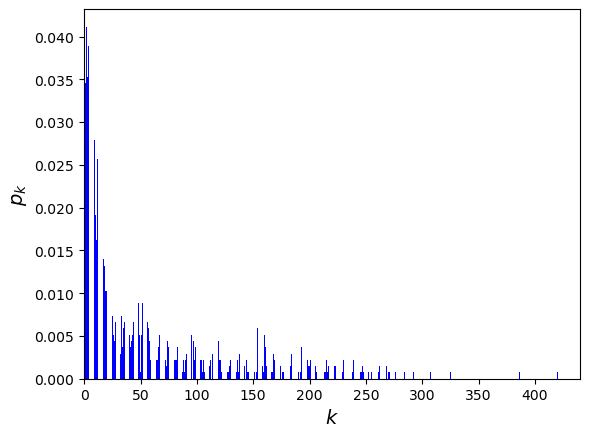

In [12]:
import matplotlib.pyplot as plt
x = list(range(max(d.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
print(x)
print(y)

plt.bar(x, y, width=0.5, color="blue")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("$p_k$", fontsize=14)
plt.xlim([0,440])

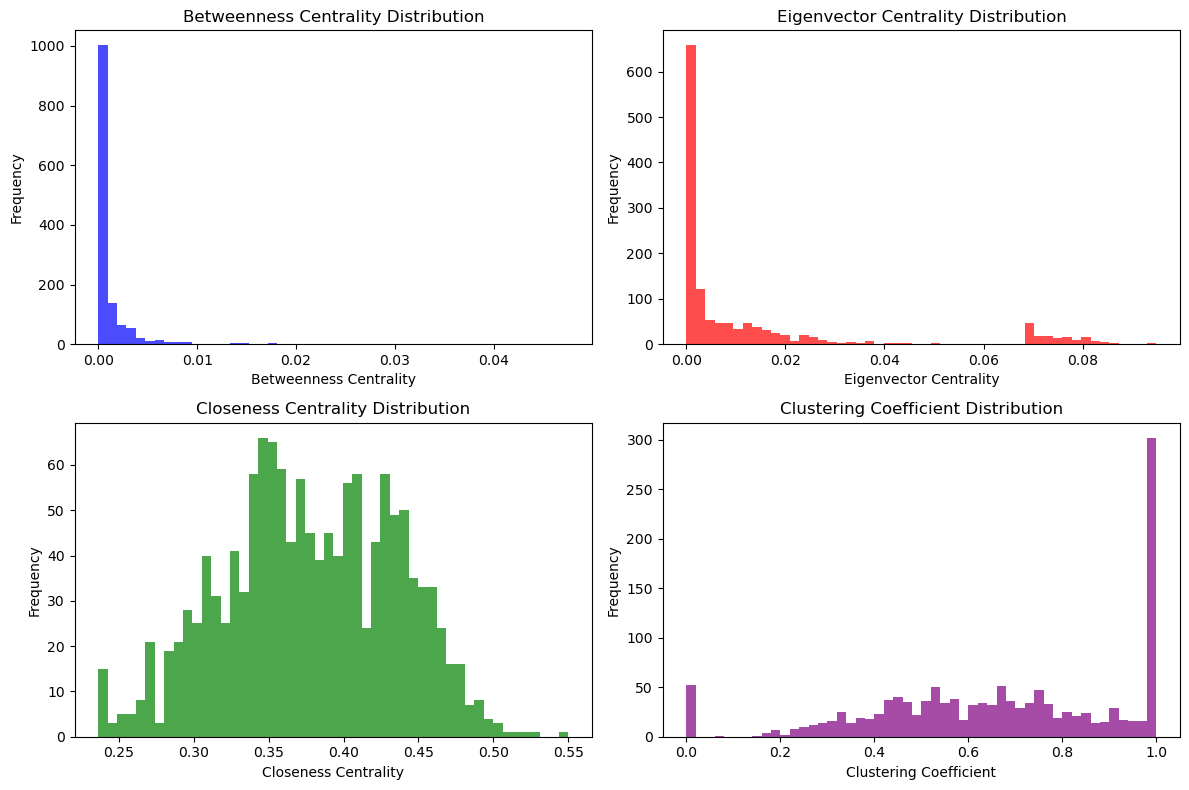

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Betweenness Centrality
betweenness = nx.betweenness_centrality(G)

# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)

# Closeness Centrality
closeness = nx.closeness_centrality(G)

# Clustering Coefficient
clustering = nx.clustering(G)

# Plot distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(list(betweenness.values()), bins=50, color='blue', alpha=0.7)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(list(eigenvector.values()), bins=50, color='red', alpha=0.7)
plt.title('Eigenvector Centrality Distribution')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(list(closeness.values()), bins=50, color='green', alpha=0.7)
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(list(clustering.values()), bins=50, color='purple', alpha=0.7)
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Get the largest connected component
largest_connected_component = max(nx.connected_components(G), key=len)

# Compute the average shortest path length for the largest connected component
average_shortest_path_length_largest_component = nx.average_shortest_path_length(G.subgraph(largest_connected_component))
print("Average Shortest Path Length (Largest Connected Component):", average_shortest_path_length_largest_component)

# Average/general longest path length
# Longest path length can be computed by finding the diameter of the largest connected component
longest_path_length = nx.diameter(G.subgraph(largest_connected_component))
print("Longest Path Length:", longest_path_length)

# Shortest path length distributions
all_shortest_paths = nx.shortest_path_length(G)
shortest_path_lengths = [length for _, lengths in all_shortest_paths.items() for length in lengths.values()]

# Longest path length distributions
all_longest_paths = nx.all_pairs_shortest_path_length(G)
longest_path_lengths = [max(lengths.values()) for _, lengths in all_longest_paths]

# Plot distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(shortest_path_lengths, bins=50, color='blue', alpha=0.7)
plt.title('Shortest Path Length Distribution')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(longest_path_lengths, bins=50, color='red', alpha=0.7)
plt.title('Longest Path Length Distribution')
plt.xlabel('Longest Path Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Average Shortest Path Length (Largest Connected Component): 2.7154849375459222
Longest Path Length: 7


AttributeError: 'generator' object has no attribute 'items'

In [24]:
import networkx as nx

# Assuming you have already created the directed graph G

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
highest_bc_product = max(betweenness_centrality, key=betweenness_centrality.get)
print("Product with Highest Betweenness Centrality:", highest_bc_product)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
highest_ec_product = max(eigenvector_centrality, key=eigenvector_centrality.get)
print("Product with Highest Eigenvector Centrality:", highest_ec_product)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
highest_cc_product = max(closeness_centrality, key=closeness_centrality.get)
print("Product with Highest Closeness Centrality:", highest_cc_product)

# Shortest Paths
shortest_paths = nx.shortest_path_length(G)
shortest_paths_at_least_2 = [(source, target) for source, lengths in shortest_paths for target, length in lengths.items() if length >= 2]
shortest_paths_at_least_2_products = [product for path in shortest_paths_at_least_2 for product in path]
shortest_paths_at_least_2_products = set(shortest_paths_at_least_2_products)
print("Products with Shortest Paths of Length at Least 2:", shortest_paths_at_least_2_products)

# Longest Paths
longest_path_lengths = nx.all_pairs_shortest_path_length(G)
longest_path_length_products = []
for source, lengths in longest_path_lengths:
    max_length = max(lengths.values())
    if max_length >= 2:
        longest_path_length_products.append(source)
print("Products with Longest Paths of Length at Least 2:", longest_path_length_products)


Product with Highest Betweenness Centrality: 222929
Product with Highest Eigenvector Centrality: 222929
Product with Highest Closeness Centrality: 222929
Products with Shortest Paths of Length at Least 2: {131081, 131082, 131083, 131085, 221199, 131092, 131099, 139299, 139311, 139312, 139313, 352310, 139319, 254011, 254012, 254013, 254014, 172111, 172112, 172113, 172114, 172115, 139411, 139412, 139420, 172199, 172211, 172212, 139499, 139510, 172299, 172311, 172312, 172313, 172314, 205111, 205112, 205114, 139599, 139613, 139614, 139615, 139616, 139617, 172399, 172411, 205210, 139699, 279011, 279012, 279013, 279020, 279031, 279032, 279033, 205310, 279041, 279043, 279044, 279045, 279052, 279053, 279060, 279070, 279082, 279099, 205399, 107111, 107112, 139911, 139912, 139913, 139915, 139919, 107199, 107211, 107212, 99019, 107219, 221910, 139999, 221920, 221930, 353011, 221940, 353012, 221950, 271110, 221960, 271121, 271122, 221971, 271123, 271125, 221973, 271124, 271132, 271141, 271142, 271

In [27]:
import networkx as nx
import community

# Assuming you have already created the directed graph G

# Assortativity
assortativity = nx.degree_assortativity_coefficient(G)
print("Assortativity Coefficient:", assortativity)

# Community Detection
# Girvan-Newman algorithm
communities_gn = nx.community.girvan_newman(G)
best_partition_gn = next(communities_gn)
print("Communities (Girvan-Newman):", best_partition_gn)

# Louvain algorithm
partition_louvain = community.best_partition(G)
print("Communities (Louvain):", partition_louvain)

# Number of out-degree and in-degree only products
outdegree_only_products = [node for node in G.nodes() if G.out_degree(node) > 0 and G.in_degree(node) == 0]
indegree_only_products = [node for node in G.nodes() if G.in_degree(node) > 0 and G.out_degree(node) == 0]

num_outdegree_only = len(outdegree_only_products)
num_indegree_only = len(indegree_only_products)
total_nodes = len(G.nodes())

percentage_outdegree_only = (num_outdegree_only / total_nodes) * 100
percentage_indegree_only = (num_indegree_only / total_nodes) * 100

print("Number of Out-degree Only Products:", num_outdegree_only)
print("Percentage of Out-degree Only Products:", percentage_outdegree_only)
print("Number of In-degree Only Products:", num_indegree_only)
print("Percentage of In-degree Only Products:", percentage_indegree_only)


Assortativity Coefficient: 0.25185282280165344
Communities (Girvan-Newman): ({131081, 131082, 131083, 131085, 221199, 131092, 131099, 139299, 139311, 139312, 139313, 352310, 139319, 254011, 254012, 254013, 254014, 172111, 172112, 172113, 172114, 172115, 139411, 139412, 139420, 172199, 172211, 172212, 139499, 139510, 172299, 172311, 172312, 172313, 172314, 205111, 205112, 205114, 139599, 139613, 139614, 139615, 139616, 139617, 172399, 172411, 205210, 139699, 279011, 279012, 279013, 279020, 279031, 279032, 279033, 205310, 279041, 279043, 279044, 279045, 279052, 279053, 279060, 279070, 279082, 279099, 205399, 107111, 107112, 139911, 139912, 139913, 139915, 139919, 107199, 107211, 99019, 107212, 107219, 221910, 139999, 221920, 221930, 353011, 221940, 353012, 221950, 271110, 221960, 271121, 271122, 271123, 271124, 221973, 271125, 221971, 271132, 271141, 271142, 271143, 271150, 221999, 107311, 107312, 271161, 271162, 271199, 263011, 263012, 263013, 271210, 263022, 172911, 263023, 271221, 263

AttributeError: module 'community' has no attribute 'best_partition'

In [28]:
import networkx as nx
import numpy as np

# Assuming you have already created the directed graph G

# Get the number of nodes and edges in the dependency network
num_nodes = len(G.nodes())
num_edges = len(G.edges())

# Calculate the edge probability for the ER random graph
p = num_edges / (num_nodes * (num_nodes - 1))

# Generate the equivalent ER random graph
er_graph = nx.erdos_renyi_graph(num_nodes, p)

# Calculate average shortest path length and clustering coefficient for the dependency network
avg_shortest_path_dependency = nx.average_shortest_path_length(G)
clustering_coeff_dependency = nx.average_clustering(G)

# Calculate average shortest path length and clustering coefficient for the ER random graph
avg_shortest_path_er = nx.average_shortest_path_length(er_graph)
clustering_coeff_er = nx.average_clustering(er_graph)

# Print the results
print("Dependency Network:")
print("- Average Shortest Path Length:", avg_shortest_path_dependency)
print("- Clustering Coefficient:", clustering_coeff_dependency)

print("ER Random Graph:")
print("- Average Shortest Path Length:", avg_shortest_path_er)
print("- Clustering Coefficient:", clustering_coeff_er)


Dependency Network:
- Average Shortest Path Length: 2.7154849375459222
- Clustering Coefficient: 0.6701077426575023
ER Random Graph:
- Average Shortest Path Length: 2.492994986385443
- Clustering Coefficient: 0.022011607001705742


In [29]:
import networkx as nx

# Assuming you have already created the directed graph G

# Step 1: Calculate node vulnerability
def calculate_node_vulnerability(G, node):
    degree_centrality = nx.degree_centrality(G)
    neighbor_vulnerabilities = [degree_centrality[neighbor] for neighbor in G.neighbors(node)]
    node_vulnerability = degree_centrality[node] * sum(neighbor_vulnerabilities)
    return node_vulnerability

node_vulnerabilities = {node: calculate_node_vulnerability(G, node) for node in G.nodes()}

# Step 2: Calculate Economic Systemic Risk Index (ESRI)
def calculate_esri(G, node, node_vulnerabilities):
    esri = 0
    for neighbor in G.neighbors(node):
        edge_weight = G[node][neighbor]['weight']
        esri += node_vulnerabilities[neighbor] * edge_weight
    return esri

esri_scores = {node: calculate_esri(G, node, node_vulnerabilities) for node in G.nodes()}

# Rank products by ESRI scores
ranked_products = sorted(esri_scores, key=esri_scores.get, reverse=True)

# Print ranked products with ESRI scores
print("Ranked Products by ESRI Scores:")
for i, product in enumerate(ranked_products, start=1):
    print(f"{i}. Product: {product} | ESRI Score: {esri_scores[product]}")

# Print systemically risky products (top 10 for example)
top_risky_products = ranked_products[:10]  # Adjust the number as needed
print("\nTop Systemically Risky Products:")
for product in top_risky_products:
    print(product)


Ranked Products by ESRI Scores:
1. Product: 259929 | ESRI Score: 0.04523659880960852
2. Product: 251123 | ESRI Score: 0.03918843174252662
3. Product: 222929 | ESRI Score: 0.03885841434609567
4. Product: 271231 | ESRI Score: 0.03648618862943695
5. Product: 271240 | ESRI Score: 0.0337048897387562
6. Product: 273313 | ESRI Score: 0.0324282052892441
7. Product: 256220 | ESRI Score: 0.030132586358358672
8. Product: 293230 | ESRI Score: 0.029521285453347437
9. Product: 279041 | ESRI Score: 0.029002662372828086
10. Product: 273311 | ESRI Score: 0.02888148380939362
11. Product: 289939 | ESRI Score: 0.02807243369439682
12. Product: 279044 | ESRI Score: 0.02726849808650705
13. Product: 265185 | ESRI Score: 0.026196235477389338
14. Product: 282219 | ESRI Score: 0.02479328129189951
15. Product: 221973 | ESRI Score: 0.024538743724543323
16. Product: 274030 | ESRI Score: 0.02438680968325396
17. Product: 259411 | ESRI Score: 0.024369392825405314
18. Product: 273213 | ESRI Score: 0.02412896860575129
1